<a href="https://colab.research.google.com/github/IFBbot1/CPP/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/lgpedersen/hwm14.git

  Cloning https://github.com/lgpedersen/hwm14.git to /tmp/pip-req-build-spwtdwxq
  Running command git clone --filter=blob:none --quiet https://github.com/lgpedersen/hwm14.git /tmp/pip-req-build-spwtdwxq
  Resolved https://github.com/lgpedersen/hwm14.git to commit eaa2af228c084f4f77aacc9896519108e5bdf6f2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hwm14: filename=hwm14-0.9.1-cp311-cp311-linux_x86_64.whl size=350640 sha256=e6cd9ef15b25fb76a063144a7a239dc9134aba4d29723602b3d7b84fad065472
  Stored in directory: /tmp/pip-ephem-wheel-cache-x7o849f7/wheels/cf/db/7a/c14869a425ab1a0b3e3fa3c463bc45d3a7f2ac7bb237720eed
  Created wheel for sciencedates: filename=sciencedates-1.5.0-py3-none-any.whl size=9902 sha256=929d7902454928ef382c2f9ece0b0ff1f878f6c46

In [ ]:
import hwm14
from hwm14 import plots

import datetime as dt


In [ ]:
# при вызове задается:
#    дата - как объект dt.datetime
#    altkm: набор высот (в километрах)
#    широта (в градусах северной широты)
#    долгота (в градусах восточной долготы)
#    индекс 107 средний за 90 дней
#    индекс f107 текущий
#    индекс ap
# hwm14Obj = hwm14.run(altkm =[52.104], altstp = 1, ap = [-1, 35], day = 58, option = 1, ut = 11.66667, verbose = False, year=1993)
# hwm = HWM14Plot(profObj=windHWM)
winds = hwm14.run(dt.datetime(2025, 3, 6, 8), altkm=(250), glat=52., glon=104., f107a=150, f107=150, ap=4)

In [ ]:
winds

<xarray.Dataset> Size: 24B
Dimensions:     (alt_km: 1)
Coordinates:
  * alt_km      (alt_km) float64 8B 250.0
Data variables:
    meridional  (alt_km) float64 8B 57.46
    zonal       (alt_km) float64 8B 23.15
Attributes:
    time:     2025-03-06T08:00:00
    glat:     52.0
    glon:     104.0

In [ ]:
winds.to_dataframe()

,meridional,zonal
alt_km,,
250.0,57.461174,23.151981


In [ ]:
winds

<xarray.Dataset> Size: 24B
Dimensions:     (alt_km: 1)
Coordinates:
  * alt_km      (alt_km) float64 8B 250.0
Data variables:
    meridional  (alt_km) float64 8B 57.46
    zonal       (alt_km) float64 8B 23.15
Attributes:
    time:     2025-03-06T08:00:00
    glat:     52.0
    glon:     104.0

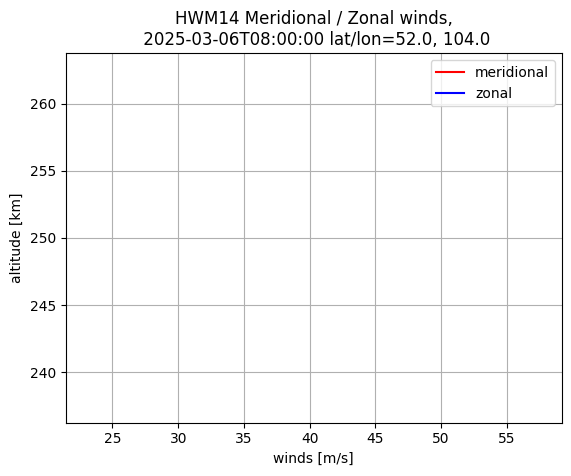

In [ ]:
hwm14.plots.plothwm(winds)

In [ ]:
# можно преобразовать в датафрейм pandas
import pandas as pd
df = winds.to_dataframe()

In [ ]:
df

,meridional,zonal
alt_km,,
250.0,57.461174,23.151981


<Axes: xlabel='alt_km'>

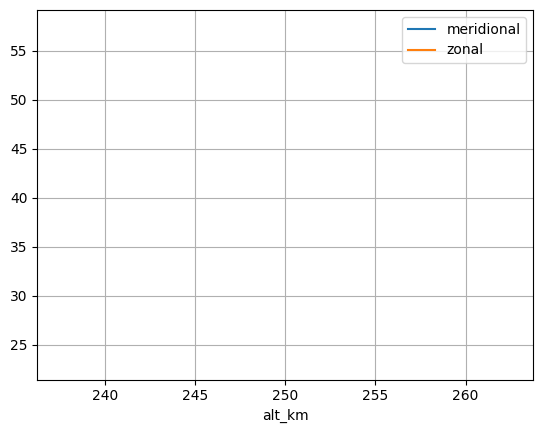

In [ ]:
df.plot(grid=True)

In [ ]:
def func1(dates):
  result = []
  for d in dates:
    result.append(d.hour)
  return result

In [ ]:
import pandas as pd
dates = pd.date_range('2025-03-27', '2025-03-28', freq='1h')

In [ ]:
func1(dates)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0]

In [ ]:
# @title Текст заголовка по умолчанию
datt=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0]
def wnd():
  windd = list()
  for i in df.func1(dates):
   k = hwm14.run(dt.datetime(2025, 3, 6, i), altkm=(250), glat=52., glon=104., f107a=150, f107=150, ap=4)
   w = k.to_dataframe()
   windd.append(w)
  return windd



In [ ]:
import pandas as pd
#ww=pd.DataFrame(windd)
data = pd.read_hdf('inds.hdf')
data

,f107,f107a,ap
2021-03-04,74.1,73.1,9
2021-03-05,73.9,73.1,4
2021-03-06,74.4,73.1,15
2021-03-07,76.4,73.1,8
2021-03-08,78.7,73.1,4
...,...,...,...
2023-12-28,141.8,153.5,1
2023-12-29,138.2,154.2,5
2023-12-30,135.1,154.6,3
2023-12-31,141.4,154.7,2
